In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from pptoolbox.visualization import initialize_theme
cmaps = initialize_theme()

Registered profileprint_light_cmap
Registered profileprint_diverging_cmap


# import and preprocess

In [3]:
pulldate = '250218'

In [4]:
label_num_df = pd.read_csv(f'../data/raw/info_num_{pulldate}.csv')
label_num_df

,lot_id,lot_name,property_name,property_value,company_id,product_type_id,product_name
0,69163,MRKU8144625,Sensory Value,1.67,1243,6579,Cocoa Butter
1,69164,GESU1118008,Sensory Value,1.83,1243,6579,Cocoa Butter
2,69165,PCIU1703142,Sensory Value,1.80,1243,6579,Cocoa Butter
3,69166,MSKU4082229,Sensory Value,1.83,1243,6579,Cocoa Butter
4,69169,HASU1260204,Sensory Value,0.25,1243,6579,Cocoa Butter
...,...,...,...,...,...,...,...
774,90820,CAAU2223430,Sensory Value,0.71,1243,6579,Cocoa Butter
775,90821,CAAU2225577,Sensory Value,0.80,1243,6579,Cocoa Butter
776,90941,WHSU0152695,Sensory Value,0.14,1243,6579,Cocoa Butter
777,90942,WHSU0177902,Sensory Value,0.57,1243,6579,Cocoa Butter


In [5]:
label_cat_df = pd.read_csv(f'../data/raw/info_cat_{pulldate}.csv')
label_cat_df

,lot_id,lot_name,property_name,property_value,company_id,product_type_id,product_name
0,69163,MRKU8144625,Deodorization Level,Non-Deodorized,1243,6579,Cocoa Butter
1,69163,MRKU8144625,Sensory Result,Fail,1243,6579,Cocoa Butter
2,69163,MRKU8144625,Ash,Present,1243,6579,Cocoa Butter
3,69163,MRKU8144625,Fishy,Absent,1243,6579,Cocoa Butter
4,69163,MRKU8144625,Musty,Absent,1243,6579,Cocoa Butter
...,...,...,...,...,...,...,...
15512,90943,SEGU2176282,Oxidized (Old Butter-Stale-Cardboard),Absent,1243,6579,Cocoa Butter
15513,90943,SEGU2176282,Astringent,Absent,1243,6579,Cocoa Butter
15514,90943,SEGU2176282,Earthy,Absent,1243,6579,Cocoa Butter
15515,90943,SEGU2176282,Acetic,Absent,1243,6579,Cocoa Butter


In [6]:
raw_df = pd.read_csv(f'../data/raw/spectra_{pulldate}.csv')

In [7]:
raw_df.head()

,lot_id,specimen_id,lot_name,date_scanned,analyser_id,company_id,product_id,product_name,raw_data,dark_ref_data,white_ref_data,dark_ref_scan_time,white_ref_scan_time
0,78500,470951,06924GOL7A,1727790925,72,1243,6579,Cocoa Butter,"[{""wavelength"": 336.2986755371094, ""reflectanc...","[117.8205, 117.8785625, 113.0476875, 116.91393...","[118.012, 117.7645625, 113.35925, 116.723625, ...",1727790792,1727790833
1,78500,470952,06924GOL7A,1727790942,72,1243,6579,Cocoa Butter,"[{""wavelength"": 336.2986755371094, ""reflectanc...","[117.8205, 117.8785625, 113.0476875, 116.91393...","[118.012, 117.7645625, 113.35925, 116.723625, ...",1727790792,1727790833
2,78500,470953,06924GOL7A,1727790959,72,1243,6579,Cocoa Butter,"[{""wavelength"": 336.2986755371094, ""reflectanc...","[117.8205, 117.8785625, 113.0476875, 116.91393...","[118.012, 117.7645625, 113.35925, 116.723625, ...",1727790792,1727790833
3,78500,470954,06924GOL7A,1727790975,72,1243,6579,Cocoa Butter,"[{""wavelength"": 336.2986755371094, ""reflectanc...","[117.8205, 117.8785625, 113.0476875, 116.91393...","[118.012, 117.7645625, 113.35925, 116.723625, ...",1727790792,1727790833
4,78500,470955,06924GOL7A,1727791033,72,1243,6579,Cocoa Butter,"[{""wavelength"": 336.2986755371094, ""reflectanc...","[117.8205, 117.8785625, 113.0476875, 116.91393...","[118.012, 117.7645625, 113.35925, 116.723625, ...",1727790792,1727790833


In [8]:
raw_df['lot_id'].nunique()

782

In [9]:
# what lots are disjoin in raw_df and label_num_df
raw_lots_set = set(raw_df['lot_id'].unique())
label_num_set = set(label_num_df['lot_id'].unique())
label_cat_set = set(label_cat_df['lot_id'].unique())

print (f"missing num labels for {raw_lots_set - label_num_set}")
print (f"missing cat labels for {raw_lots_set - label_cat_set}")

#which set is larger
len(raw_lots_set), len(label_num_set), len(label_cat_set)

missing num labels for {73883, 74047, 69191}
missing cat labels for set()


(782, 779, 782)

In [10]:
# filter labels to only contain those with same lot id as raw_df
label_num_df_clean = label_num_df[label_num_df['lot_id'].isin(raw_df['lot_id'])]
label_cat_df_clean = label_cat_df[label_cat_df['lot_id'].isin(raw_df['lot_id'])]

label_num_df_clean['lot_id'].nunique(), label_cat_df_clean['lot_id'].nunique()

(779, 782)

In [11]:
label_cat_df_clean = label_cat_df_clean.pivot(index=['lot_id','lot_name'],columns=['property_name'],values='property_value')

In [12]:
label_cat_df_clean

,property_name,Acetic,Ash,Astringent,Bitter,Brown Fruit,Cacao (Chocolate),Carbon,Deodorization Level,Earthy,Fishy,Heated Fat (Oil),Musty,Oxidized (Old Butter-Stale-Cardboard),Painty (Solvent-Chemical),Petroleum (Motor Oil-Rubber),Putrid,Sensory Result,Smoky,Sour,Straw (Hay)
lot_id,lot_name,,,,,,,,,,,,,,,,,,,,
69163,MRKU8144625,Absent,Present,Absent,Present,Present,Absent,Present,Non-Deodorized,Absent,Absent,Present,Absent,Absent,Present,Present,Absent,Fail,Present,Absent,Absent
69164,GESU1118008,Absent,Present,Absent,Absent,Absent,Present,Present,Non-Deodorized,Absent,Absent,Present,Absent,Absent,Absent,Absent,Absent,Fail,Present,Absent,Absent
69165,PCIU1703142,Absent,Present,Absent,Present,Absent,Present,Present,Non-Deodorized,Absent,Present,Present,Absent,Present,Absent,Absent,Absent,Fail,Present,Present,Present
69166,MSKU4082229,Absent,Present,Absent,Absent,Absent,Absent,Absent,Non-Deodorized,Absent,Absent,Absent,Present,Absent,Present,Present,Absent,Fail,Present,Absent,Absent
69169,HASU1260204,Absent,Absent,Absent,Present,Absent,Present,Present,Non-Deodorized,Absent,Absent,Present,Absent,Absent,Absent,Absent,Absent,Pass,Absent,Absent,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90820,CAAU2223430,Absent,Absent,Absent,Present,Absent,Present,Present,Non-Deodorized,Absent,Absent,Present,Absent,Absent,Absent,Absent,Absent,Pass,Absent,Absent,Absent
90821,CAAU2225577,Absent,Absent,Absent,Absent,Absent,Absent,Present,Non-Deodorized,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Pass,Absent,Present,Absent
90941,WHSU0152695,Absent,Absent,Absent,Absent,Absent,Present,Absent,Non-Deodorized,Absent,Absent,Present,Absent,Absent,Absent,Absent,Absent,Pass,Absent,Absent,Present


In [13]:
label_num_df_clean = label_num_df_clean.pivot(index=['lot_id','lot_name'],columns=['property_name'],values='property_value')

In [14]:
label_num_df_clean

,property_name,Sensory Value
lot_id,lot_name,
69163,MRKU8144625,1.67
69164,GESU1118008,1.83
69165,PCIU1703142,1.80
69166,MSKU4082229,1.83
69169,HASU1260204,0.25
...,...,...
90820,CAAU2223430,0.71
90821,CAAU2225577,0.80
90941,WHSU0152695,0.14


In [15]:
label_df_clean = pd.merge( label_cat_df_clean,label_num_df_clean, on=['lot_id','lot_name'], how='outer')
label_df_clean

,property_name,Acetic,Ash,Astringent,Bitter,Brown Fruit,Cacao (Chocolate),Carbon,Deodorization Level,Earthy,Fishy,...,Musty,Oxidized (Old Butter-Stale-Cardboard),Painty (Solvent-Chemical),Petroleum (Motor Oil-Rubber),Putrid,Sensory Result,Smoky,Sour,Straw (Hay),Sensory Value
lot_id,lot_name,,,,,,,,,,,,,,,,,,,,,
69163,MRKU8144625,Absent,Present,Absent,Present,Present,Absent,Present,Non-Deodorized,Absent,Absent,...,Absent,Absent,Present,Present,Absent,Fail,Present,Absent,Absent,1.67
69164,GESU1118008,Absent,Present,Absent,Absent,Absent,Present,Present,Non-Deodorized,Absent,Absent,...,Absent,Absent,Absent,Absent,Absent,Fail,Present,Absent,Absent,1.83
69165,PCIU1703142,Absent,Present,Absent,Present,Absent,Present,Present,Non-Deodorized,Absent,Present,...,Absent,Present,Absent,Absent,Absent,Fail,Present,Present,Present,1.80
69166,MSKU4082229,Absent,Present,Absent,Absent,Absent,Absent,Absent,Non-Deodorized,Absent,Absent,...,Present,Absent,Present,Present,Absent,Fail,Present,Absent,Absent,1.83
69169,HASU1260204,Absent,Absent,Absent,Present,Absent,Present,Present,Non-Deodorized,Absent,Absent,...,Absent,Absent,Absent,Absent,Absent,Pass,Absent,Absent,Absent,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90820,CAAU2223430,Absent,Absent,Absent,Present,Absent,Present,Present,Non-Deodorized,Absent,Absent,...,Absent,Absent,Absent,Absent,Absent,Pass,Absent,Absent,Absent,0.71
90821,CAAU2225577,Absent,Absent,Absent,Absent,Absent,Absent,Present,Non-Deodorized,Absent,Absent,...,Absent,Absent,Absent,Absent,Absent,Pass,Absent,Present,Absent,0.80
90941,WHSU0152695,Absent,Absent,Absent,Absent,Absent,Present,Absent,Non-Deodorized,Absent,Absent,...,Absent,Absent,Absent,Absent,Absent,Pass,Absent,Absent,Present,0.14


In [16]:
# Identify columns with NA
na_columns = label_df_clean.columns[label_df_clean.isna().any()]

# Display rows with NA, showing only affected columns
display(label_df_clean.loc[label_df_clean.isna().any(axis=1), na_columns])

,property_name,Acetic,Astringent,Earthy,Putrid,Sensory Value
lot_id,lot_name,,,,,
69191,HASU1010210,Absent,Absent,Absent,Absent,NaN
70153,STJU2025162,NaN,NaN,NaN,NaN,0.17
70166,PONU2033293,NaN,NaN,Present,NaN,0.50
70354,MSKU6916110,NaN,NaN,NaN,NaN,0.38
70378,TLLU2480651,NaN,NaN,NaN,NaN,1.11
70395,MRKU6201808,NaN,NaN,NaN,NaN,1.33
73883,HLBU3004302,Absent,Absent,Absent,Absent,NaN
74047,TCLU1977537,Absent,Absent,Absent,Absent,NaN
76894,250424311,NaN,NaN,NaN,NaN,1.50


Number of rows before removing NA: 782
Number of rows after removing NA: 748


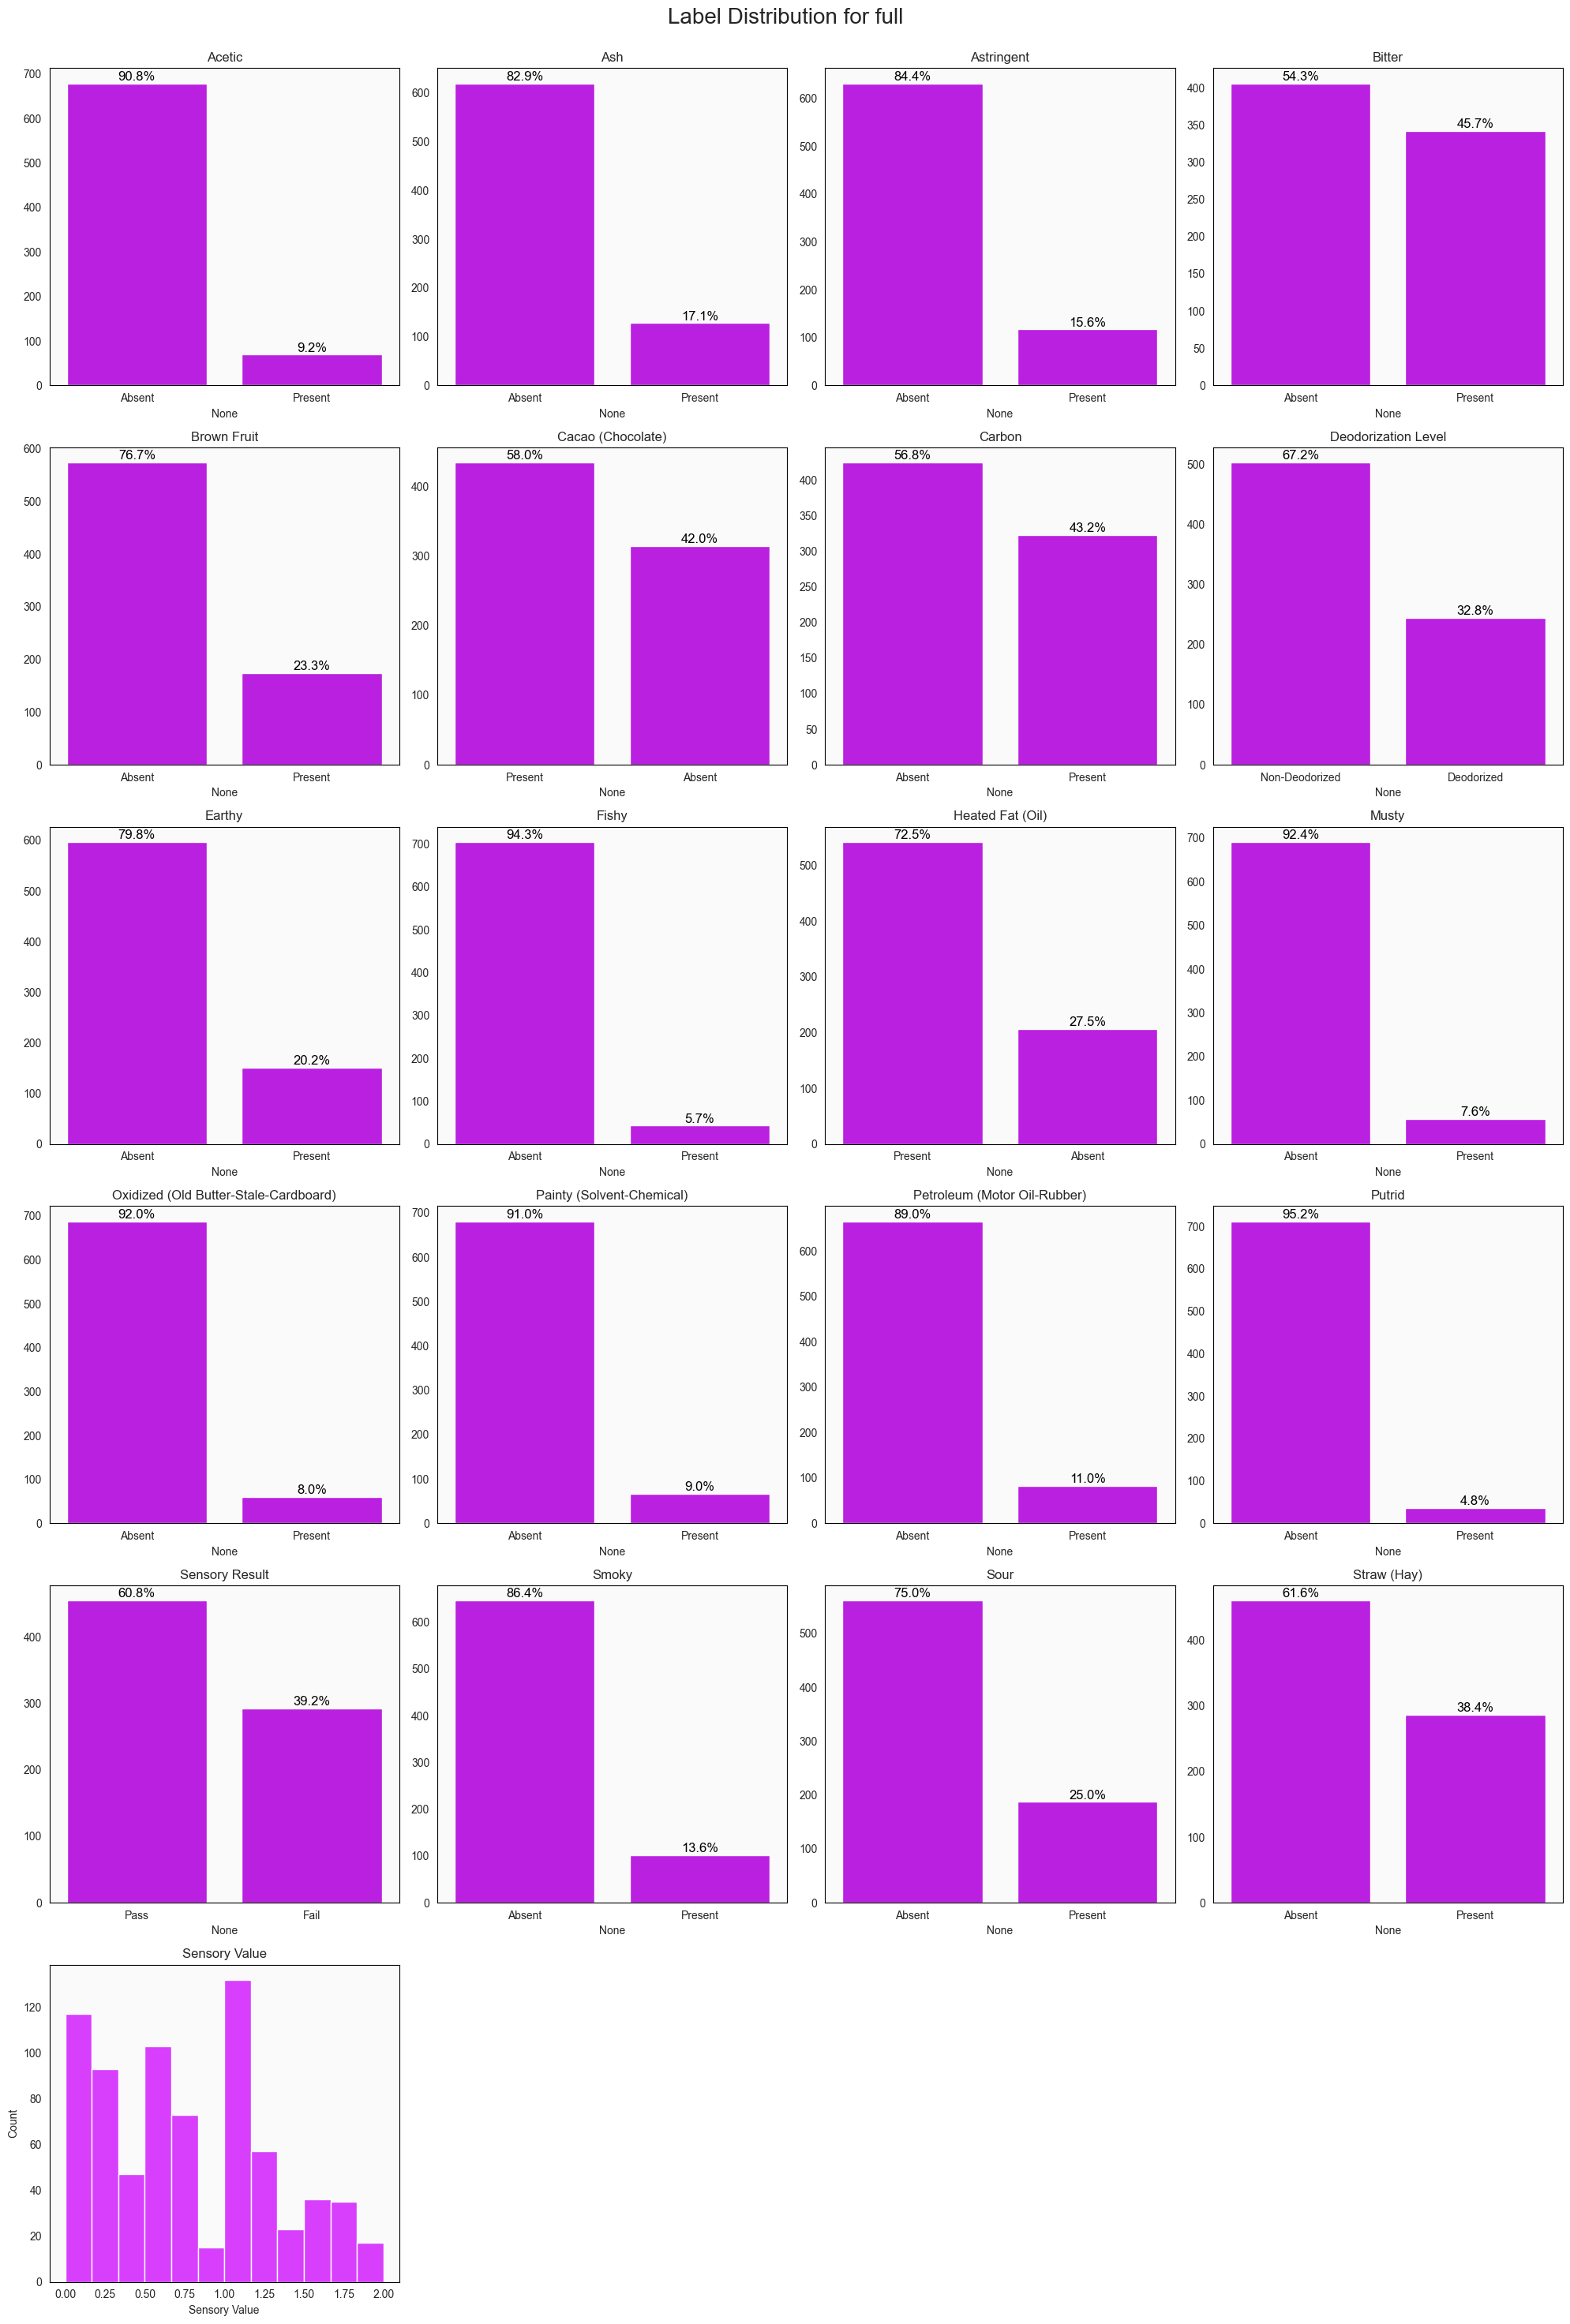

In [19]:
#drop rows with NA
label_df_clean_removena = label_df_clean.dropna(axis=0)
print(f"Number of rows before removing NA: {label_df_clean.shape[0]}")
print(f"Number of rows after removing NA: {label_df_clean_removena.shape[0]}")

num_cols = len(label_df_clean_removena.columns)
rows = int(np.ceil(num_cols / 4))  # Calculate required rows dynamically
fig, ax = plt.subplots(rows, 4, figsize=(20, 5 * rows))
fig.suptitle('Label Distribution for full\n\n', fontsize=20)

# Flatten ax to avoid indexing issues when rows < 4
ax = ax.flatten()

for i, col in enumerate(label_df_clean_removena.columns):
    if label_df_clean_removena[col].dtype == 'float64':
        sns.histplot(label_df_clean_removena[col], ax=ax[i])
        ax[i].set_title(f'{col}')
    else:
        value_counts = label_df_clean_removena[col].value_counts()
        total = value_counts.sum()  # Get total count for percentage
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax[i])
        ax[i].set_title(f'{col}')
        
        # Add percentage labels
        for j, value in enumerate(value_counts.values):
            percentage = (value / total) * 100
            ax[i].text(j, value + 0.01 * max(value_counts.values), f'{percentage:.1f}%', ha='center', fontsize=12, color='black')


# Hide any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.savefig(f'../data/processed/label_distribution_combined_{pulldate}.png', bbox_inches='tight')
plt.show()


In [23]:
output_dir = Path(f"../data/processed")
output_dir.mkdir(exist_ok=True, parents=True)

label_df_output = label_df_clean.reset_index().set_index('lot_id')

label_df_output.to_csv(output_dir/f"label_{pulldate}.csv")
label_df_output.shape

(782, 22)

In [24]:
output_dir = Path(f"../data/processed")
label_df = pd.read_csv(output_dir/f"label_{pulldate}.csv")
label_df = label_df.set_index(['lot_id','lot_name'])
label_df

,,Acetic,Ash,Astringent,Bitter,Brown Fruit,Cacao (Chocolate),Carbon,Deodorization Level,Earthy,Fishy,...,Musty,Oxidized (Old Butter-Stale-Cardboard),Painty (Solvent-Chemical),Petroleum (Motor Oil-Rubber),Putrid,Sensory Result,Smoky,Sour,Straw (Hay),Sensory Value
lot_id,lot_name,,,,,,,,,,,,,,,,,,,,,
69163,MRKU8144625,Absent,Present,Absent,Present,Present,Absent,Present,Non-Deodorized,Absent,Absent,...,Absent,Absent,Present,Present,Absent,Fail,Present,Absent,Absent,1.67
69164,GESU1118008,Absent,Present,Absent,Absent,Absent,Present,Present,Non-Deodorized,Absent,Absent,...,Absent,Absent,Absent,Absent,Absent,Fail,Present,Absent,Absent,1.83
69165,PCIU1703142,Absent,Present,Absent,Present,Absent,Present,Present,Non-Deodorized,Absent,Present,...,Absent,Present,Absent,Absent,Absent,Fail,Present,Present,Present,1.80
69166,MSKU4082229,Absent,Present,Absent,Absent,Absent,Absent,Absent,Non-Deodorized,Absent,Absent,...,Present,Absent,Present,Present,Absent,Fail,Present,Absent,Absent,1.83
69169,HASU1260204,Absent,Absent,Absent,Present,Absent,Present,Present,Non-Deodorized,Absent,Absent,...,Absent,Absent,Absent,Absent,Absent,Pass,Absent,Absent,Absent,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90820,CAAU2223430,Absent,Absent,Absent,Present,Absent,Present,Present,Non-Deodorized,Absent,Absent,...,Absent,Absent,Absent,Absent,Absent,Pass,Absent,Absent,Absent,0.71
90821,CAAU2225577,Absent,Absent,Absent,Absent,Absent,Absent,Present,Non-Deodorized,Absent,Absent,...,Absent,Absent,Absent,Absent,Absent,Pass,Absent,Present,Absent,0.80
90941,WHSU0152695,Absent,Absent,Absent,Absent,Absent,Present,Absent,Non-Deodorized,Absent,Absent,...,Absent,Absent,Absent,Absent,Absent,Pass,Absent,Absent,Present,0.14


# split deo and nondeo

In [25]:
deo_label_df = label_df.select_dtypes(include='object')[label_df['Deodorization Level']=='Deodorized'].reset_index().drop(columns=['Deodorization Level','lot_name'])
deo_label_df = pd.merge(deo_label_df, label_df.select_dtypes(include='float64'), on='lot_id')
deo_label_df = deo_label_df.set_index('lot_id')

nondeo_label_df = label_df.select_dtypes(include='object')[label_df['Deodorization Level']=='Non-Deodorized'].reset_index().drop(columns=['Deodorization Level','lot_name'])
nondeo_label_df = pd.merge(nondeo_label_df, label_df.select_dtypes(include='float64'), on='lot_id')
nondeo_label_df = nondeo_label_df.set_index('lot_id')

print(deo_label_df.shape, nondeo_label_df.shape)

(248, 20) (534, 20)


In [26]:
datasets = {
    'deo': deo_label_df,
    'nondeo': nondeo_label_df
}

In [27]:
#count number of rows with NA in each dataset
for key in datasets.keys():
    print(f"Number of rows with NA in {key} dataset: {datasets[key].isna().any(axis=1).sum()}")

Number of rows with NA in deo dataset: 3
Number of rows with NA in nondeo dataset: 31


Label Distribution for deo
Number of rows before removing NA: 248
Number of rows after removing NA: 245


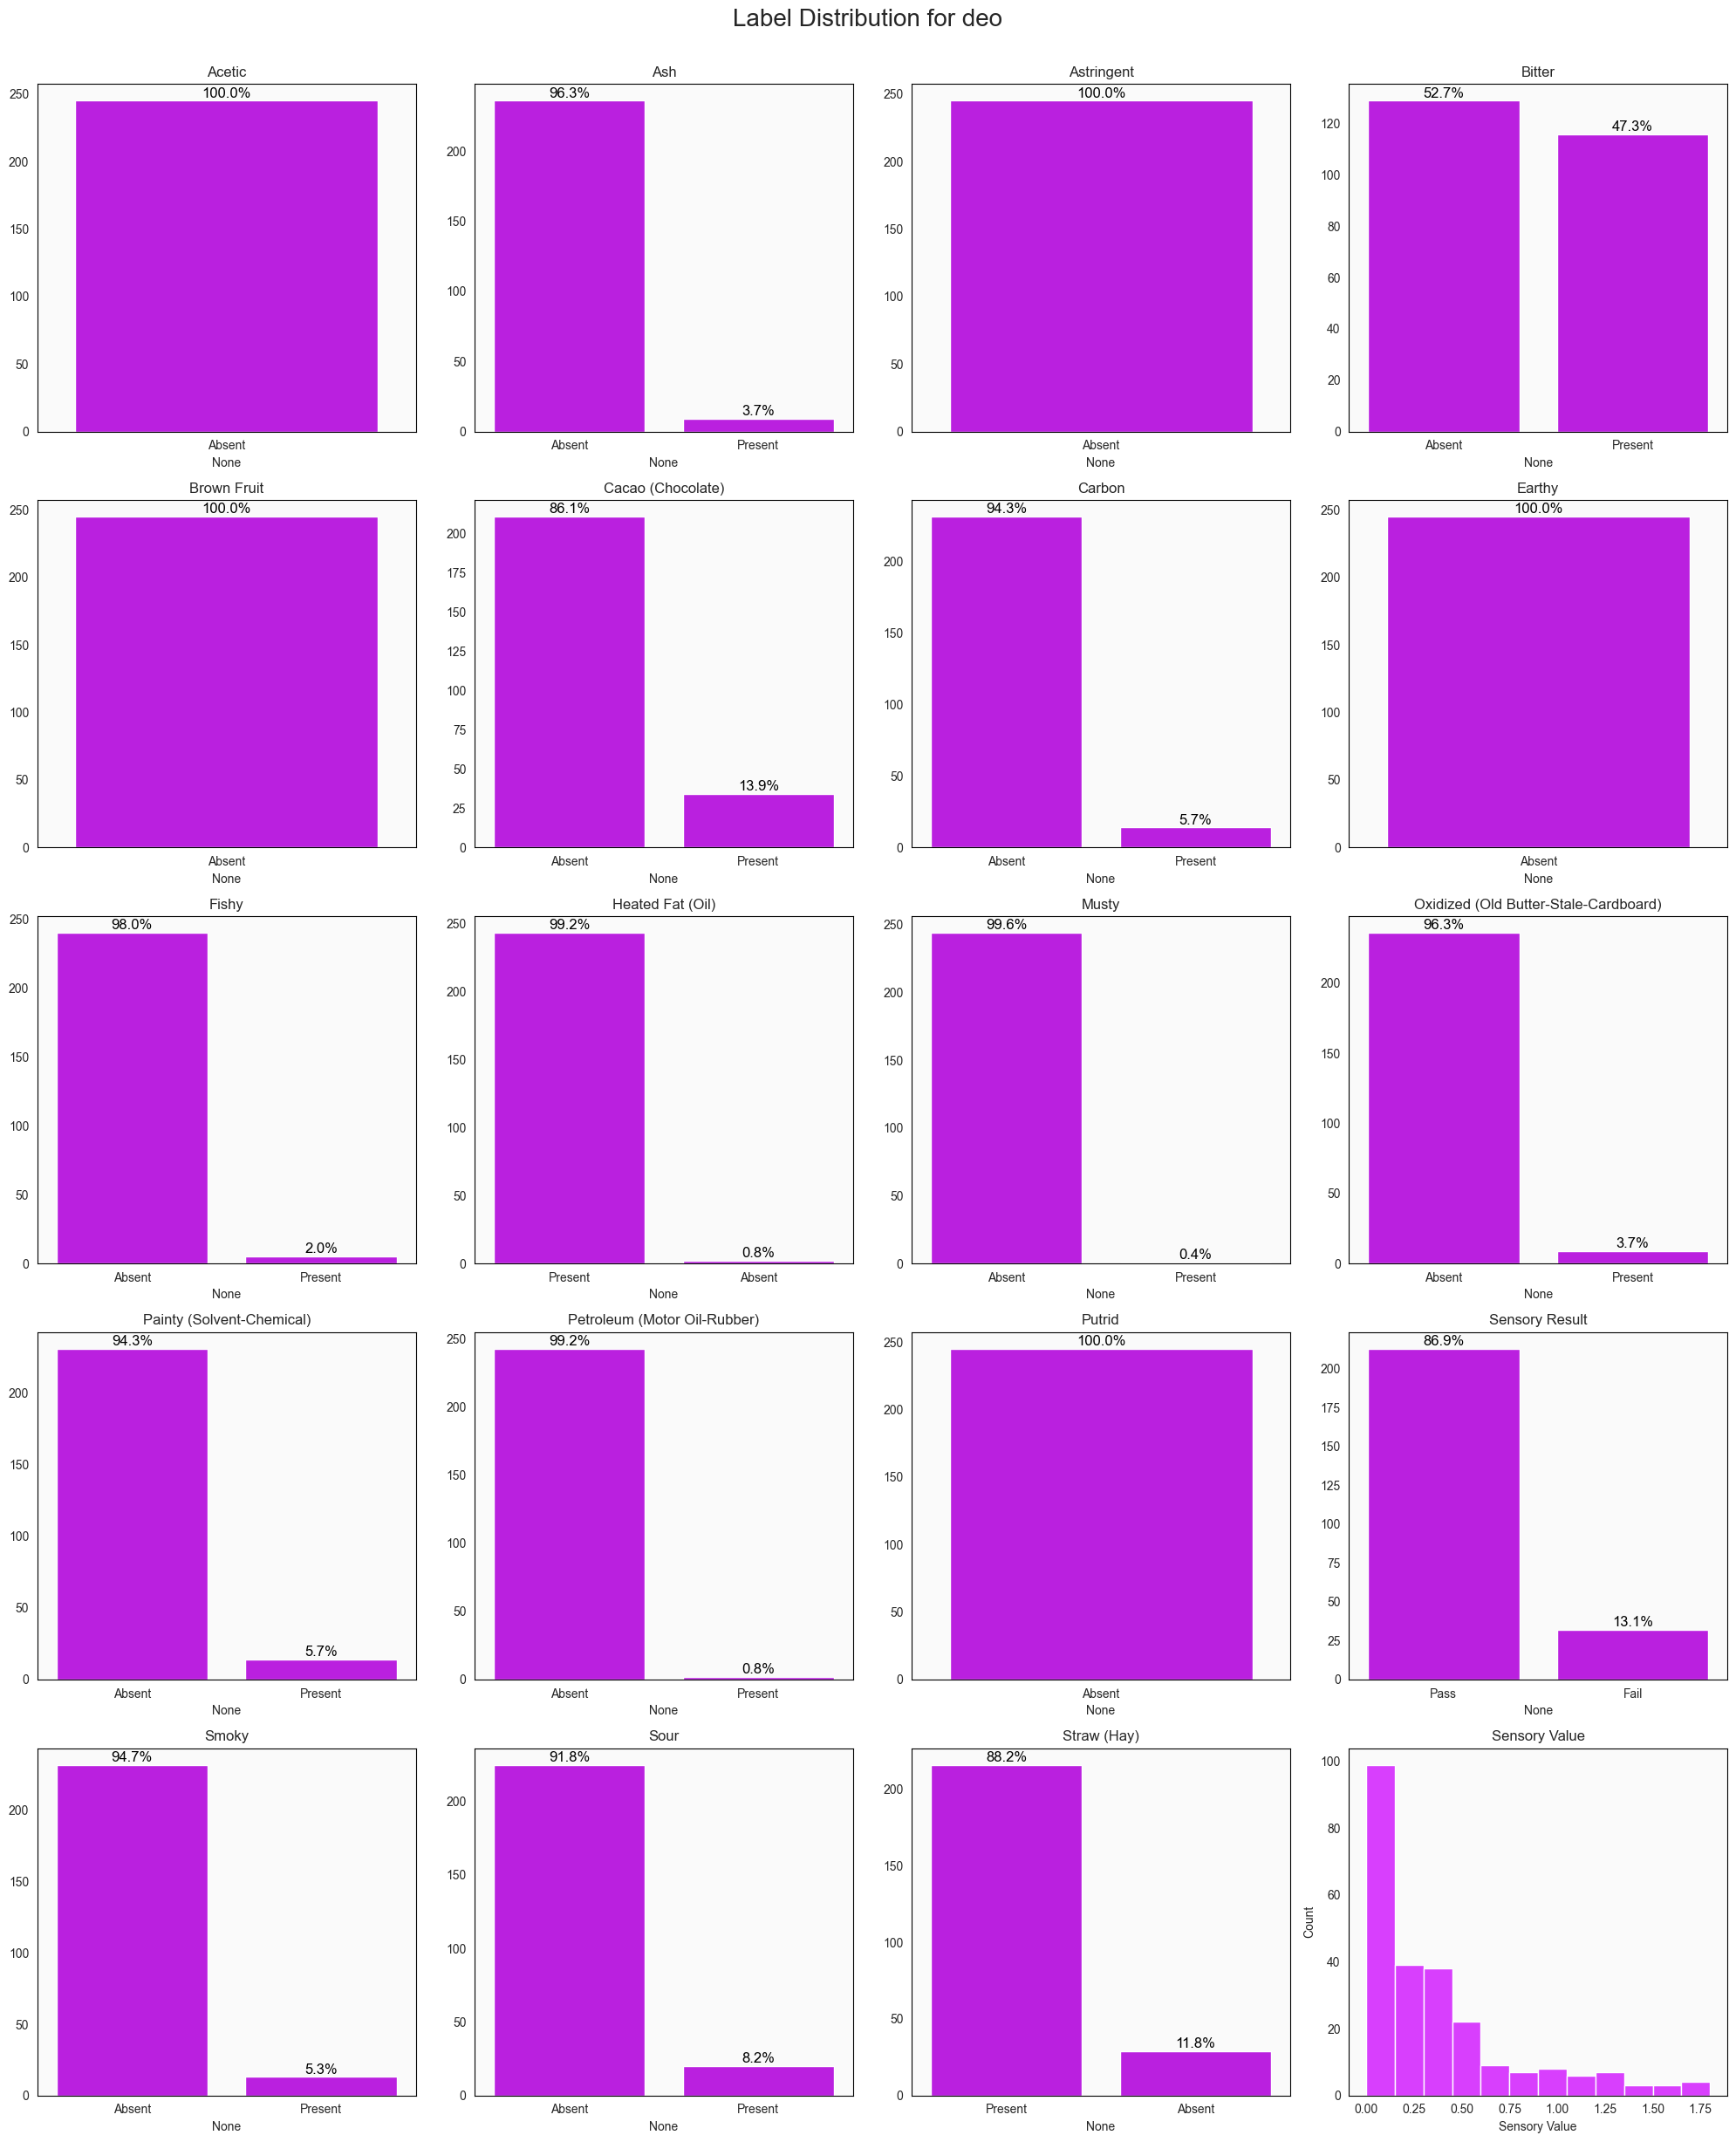

Label Distribution for nondeo
Number of rows before removing NA: 534
Number of rows after removing NA: 503


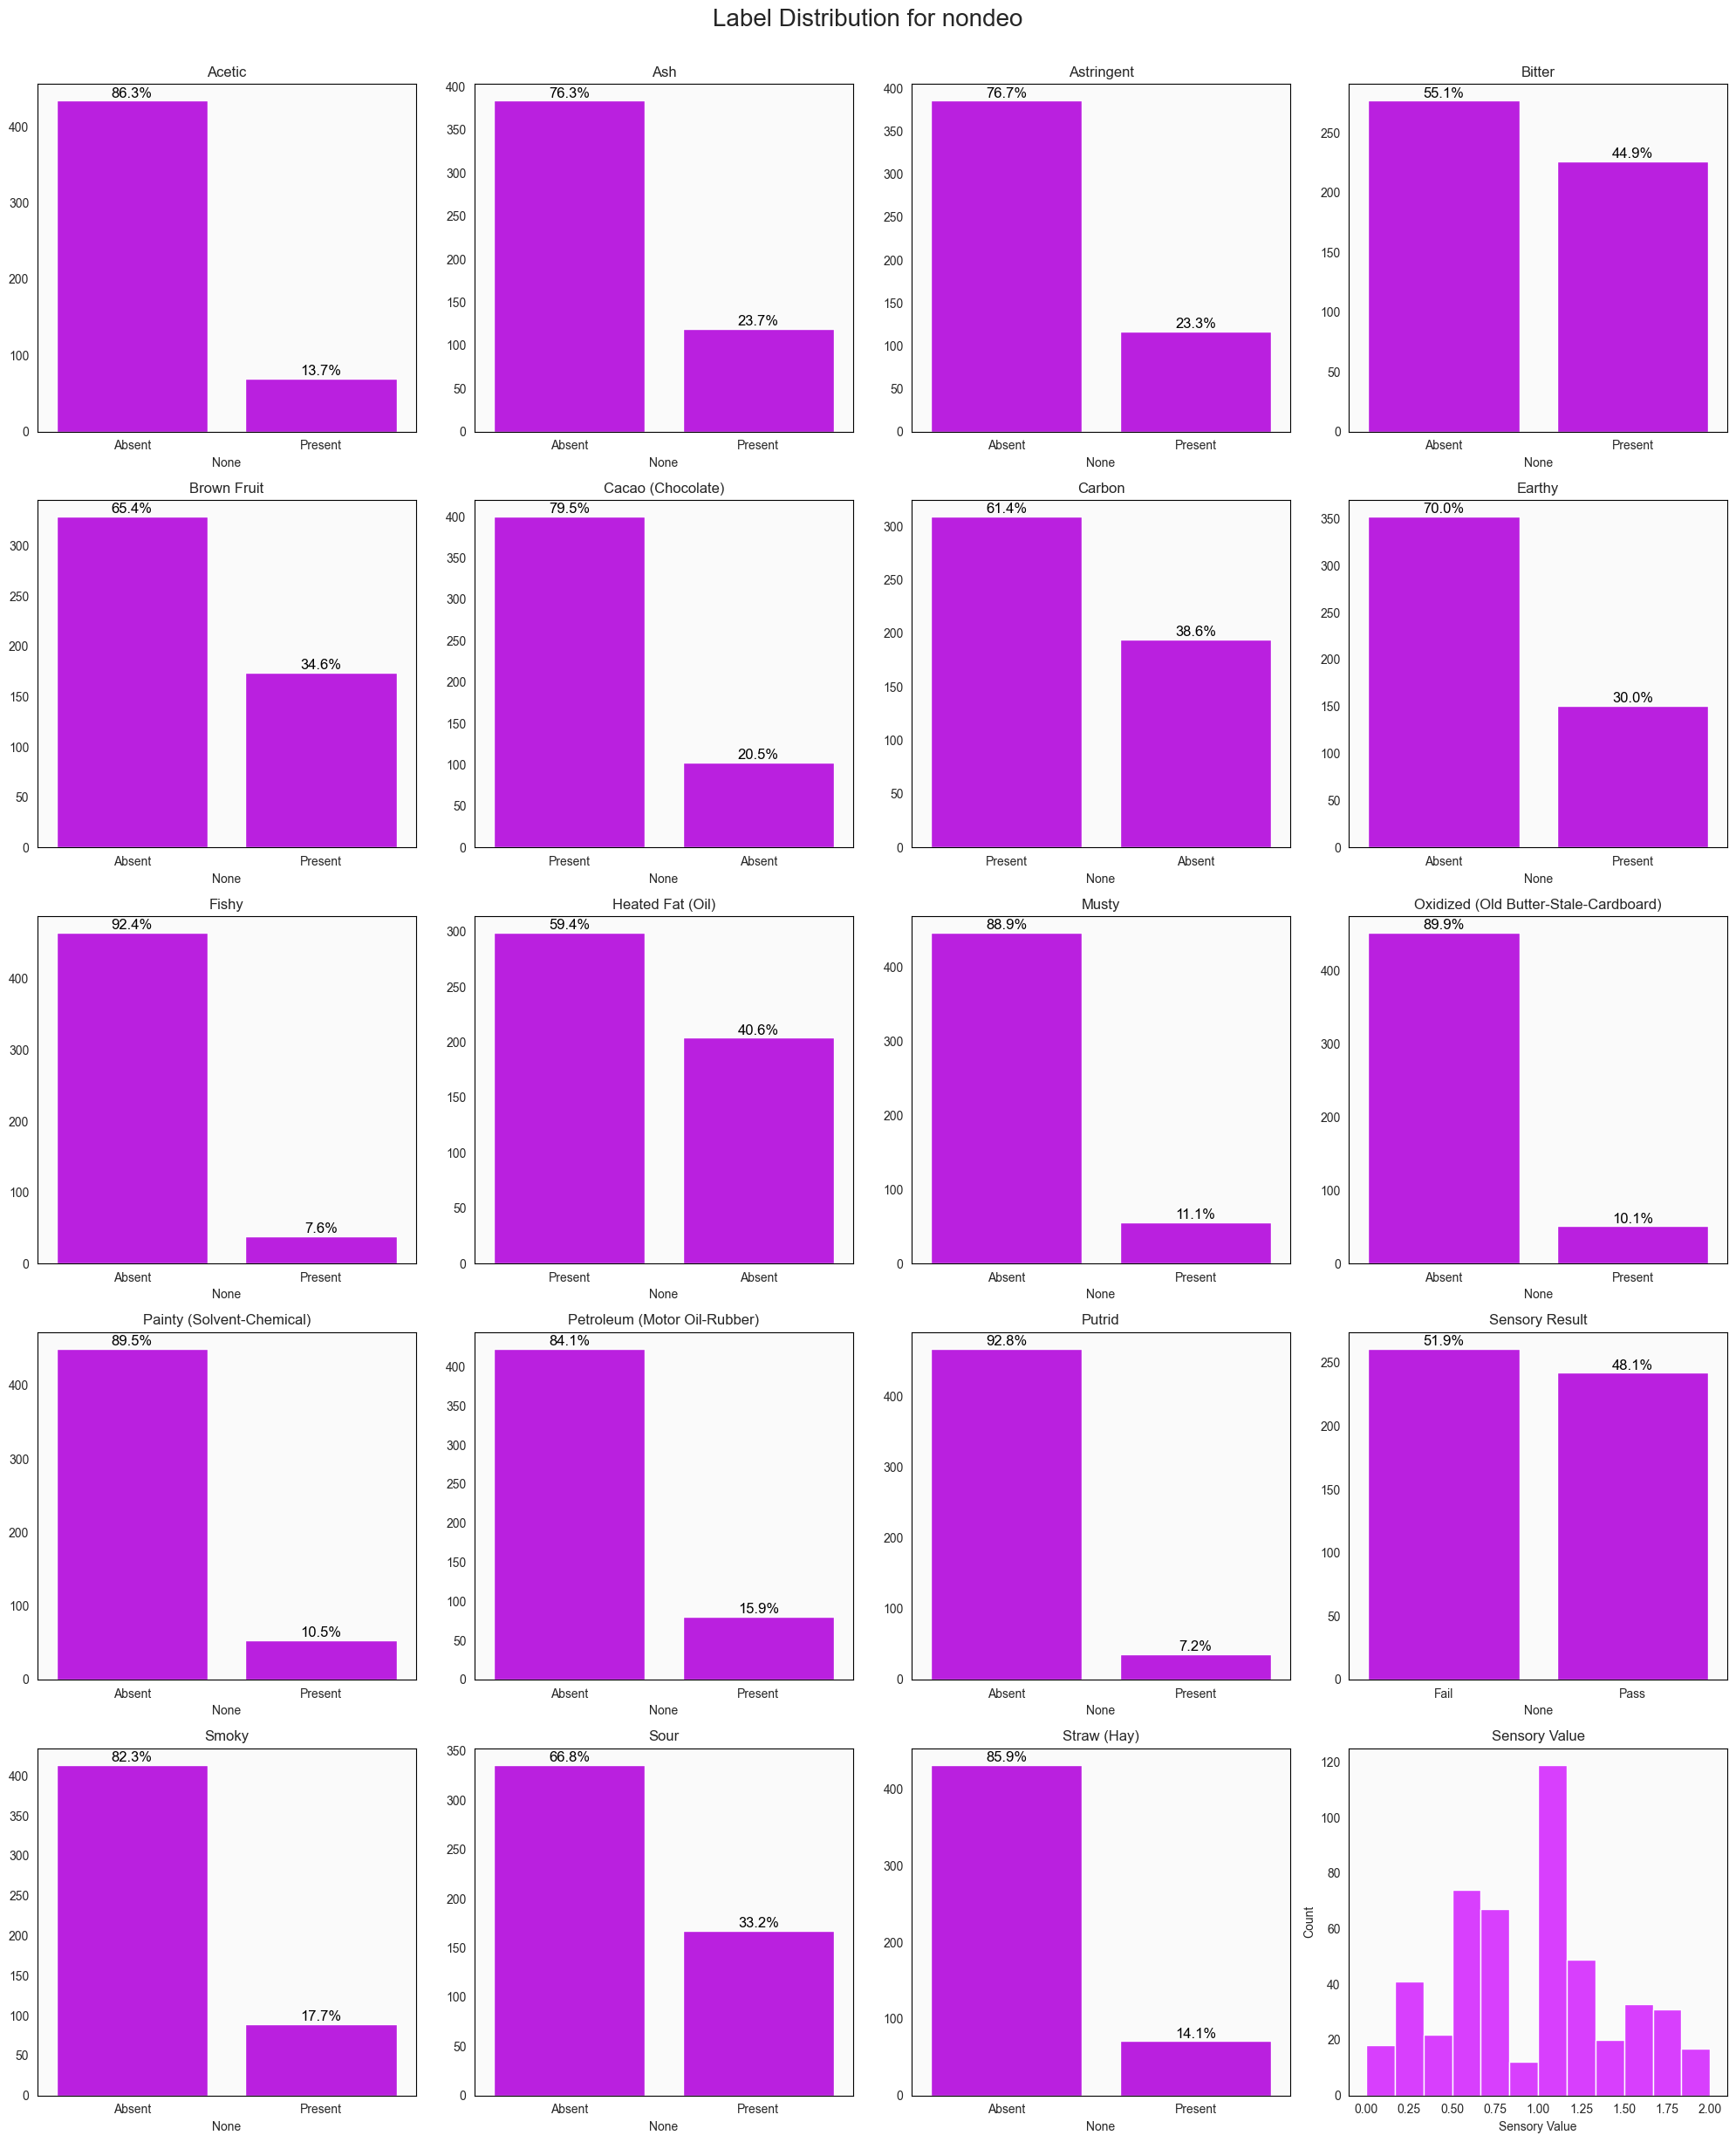

In [28]:
for dataset in datasets:
    print(f"Label Distribution for {dataset}")
    df = datasets[dataset]

    print(f"Number of rows before removing NA: {df.shape[0]}")
    df = df.dropna(axis=0)
    print(f"Number of rows after removing NA: {df.dropna(axis=0).shape[0]}")

    num_cols = len(df.columns)
    rows = int(np.ceil(num_cols / 4))  # Calculate required rows dynamically
    fig, ax = plt.subplots(rows, 4, figsize=(20, 5 * rows))
    fig.suptitle(f"Label Distribution for {dataset}\n\n", fontsize=20)

    # Flatten ax to avoid indexing issues when rows < 4
    ax = ax.flatten()

    for i, col in enumerate(df.columns):
        if df[col].dtype == 'float64':
            sns.histplot(df[col], ax=ax[i])
            ax[i].set_title(f'{col}')
        else:
            value_counts = df[col].value_counts()
            total = value_counts.sum()  # Get total count for percentage
            sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax[i])
            ax[i].set_title(f'{col}')
            
            # Add percentage labels
            for j, value in enumerate(value_counts.values):
                percentage = (value / total) * 100
                ax[i].text(j, value + 0.01 * max(value_counts.values), f'{percentage:.1f}%', ha='center', fontsize=12, color='black')


    # Hide any unused subplots
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    plt.savefig(f"../data/processed/label_distribution_{dataset}_{pulldate}.png", bbox_inches='tight')
    plt.show()